In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation ='softmax')
])

C:\Users\nihal\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.compile(optimizer ='adam',
             loss ='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [62]:
r = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs =10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8629 - loss: 0.4546 - val_accuracy: 0.9551 - val_loss: 0.1396
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9638 - loss: 0.1192 - val_accuracy: 0.9619 - val_loss: 0.1301
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9718 - loss: 0.0918 - val_accuracy: 0.9686 - val_loss: 0.1010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9781 - loss: 0.0690 - val_accuracy: 0.9708 - val_loss: 0.0993
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0590 - val_accuracy: 0.9750 - val_loss: 0.0780
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9846 - loss: 0.0467 - val_accuracy: 0.9719 - val_loss: 0.0959
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0430 - val_accuracy: 0.9724 - val_loss: 0.0935
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9878 - loss: 0.036

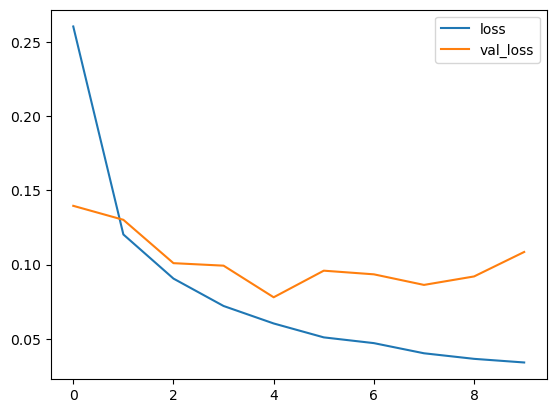

In [63]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

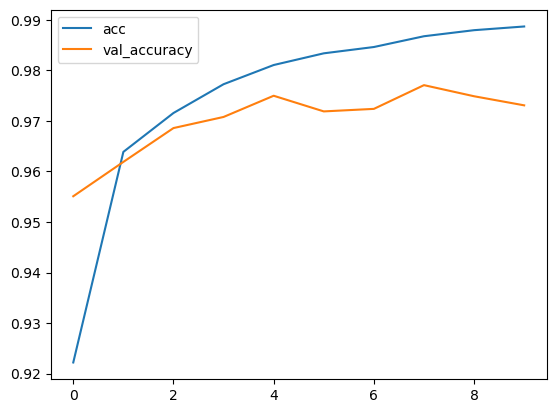

In [64]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [65]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9687 - loss: 0.1247
[0.10851158201694489, 0.9731000065803528]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion matrix, without normalization
[[ 971    0    0    0    0    0    3    2    4    0]
 [   0 1125    4    1    1    1    1    0    2    0]
 [   2    2 1005    3    3    0    5    4    8    0]
 [   1    0    4  971    0    9    0    2   20    3]
 [   0    0    3    0  959    0    5    5    3    7]
 [   3    1    1   16    2  833   12    3   11   10]
 [   2    2    0    0    1    1  950    0    2    0]
 [   0    2   14    5    1    0    1  986    7   12]
 [   5    1    2    1    3    0    2    1  957    2]
 [   2    3    0    2   14    2    0    5    7  974]]


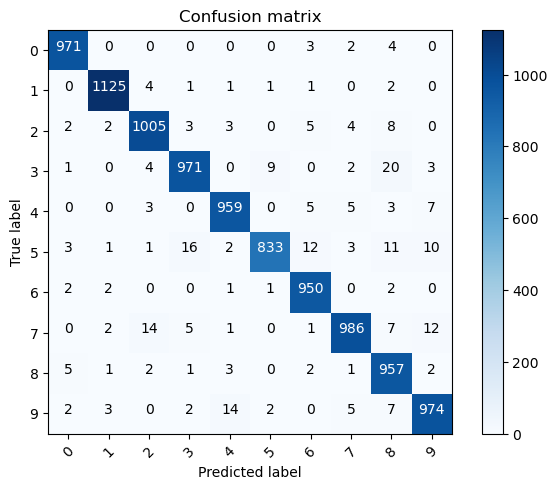

In [66]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming model, x_test, and y_test are defined
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


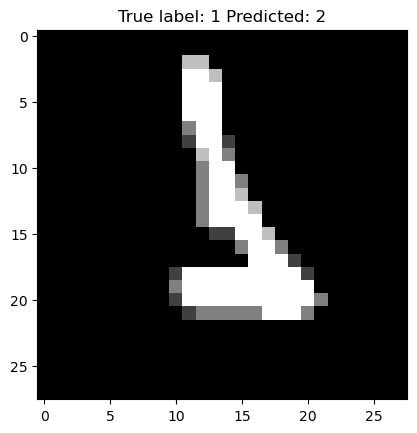

In [67]:
import numpy as np
misclassified_idx = np.where(p_test!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));